# 1. Multi Layer Perceptron

También conocida como _feed forward neural network_ es la red neuronal más conocida y general de todas.
Este tipo de arquitectura consta de muchas **neuronas** conectadas entre sí, con pocas o ninguna **capa escondida**
entre la entrada y la salida.

En este documento se implementa una MLP para clasificar el conjunto de Iris, el _hola mundo_ de los algoritmos de Machine Learning e Inteligencia Computacional.

In [1]:
from sklearn import datasets, preprocessing, model_selection
import seaborn as sns
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt

sns.set()

Using TensorFlow backend.
/home/edwinb/anaconda3/envs/deep_workshop/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/edwinb/anaconda3/envs/deep_workshop/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/edwinb/anaconda3/envs/deep_workshop/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

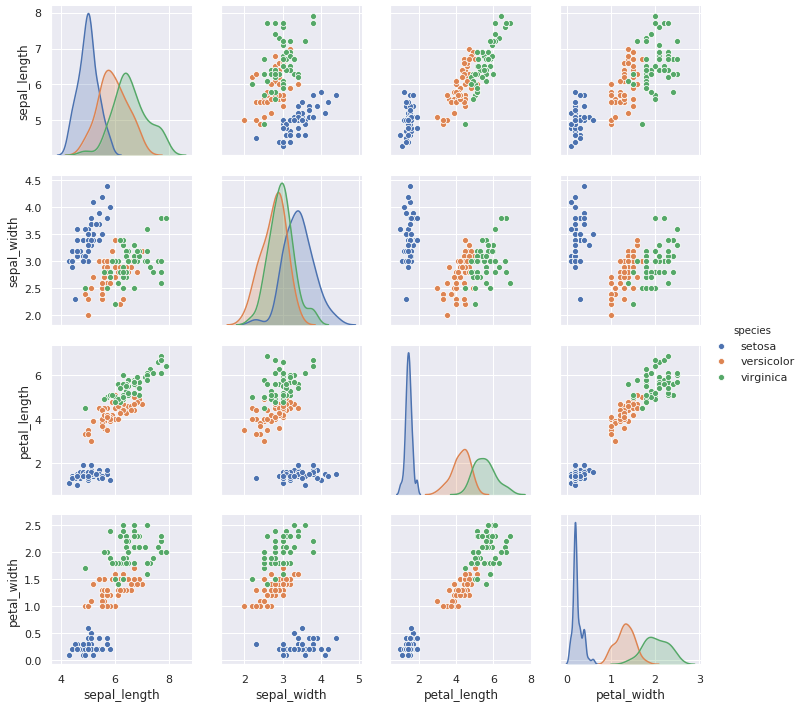

In [2]:
# Importar los datos, y realizar una exploración general
datos = sns.load_dataset("iris")
sns.pairplot(datos, hue="species")

Como se conoce, este conjunto de datos cuenta con 3 clases y 4 características, que se pueden ver hasta abajo en la figura de visualización. Este conjunto de datos contiene 150 _ejemplos,_ por lo que es un conjunto muy pequeño de datos.

Esto es algo importante a tomar en cuenta al momento de crear un diseño de arquitectura de redes neuronales, dado que son pocos datos se puede emplear un diseño simple, sin tanta profundidad.

In [3]:
# Convertir los datos a arreglos de numpy
X = datos.loc[:, ["sepal_length", "sepal_width", "petal_length", "petal_width"]].to_numpy()
y_nombres = datos["species"].to_numpy()

# Y cambiar los nombres a valores mediante One Hot encoding
enc = preprocessing.OneHotEncoder()
y_one_hot = enc.fit_transform(y_nombres.reshape(-1, 1)).toarray()

In [4]:
# Separar el conjunto de datos en prueba y entrenamiento, 80-20
# y definir una semilla para reproducibilidad
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y_one_hot,
                                                                    test_size=0.2,
                                                                   random_state=52)

Retomando las lecciones del _Deep Learning,_ se codifican las clases de forma categórica mediante _One Hot encoding_, esto para facilitar el aprendizaje y aplicación la arquitectura del MLP.

## Arquitectura del MLP

Ahora se pretende crear un MLP con una entrada, una capa oculta con 4 unidades escondidas, y una salida.

Dado que es un problema de clasificación se aplicará la función de activación ReLU, y la salida será _softmax_ categórica.

In [5]:
# Definir el número total de clases
num_clases = len(set(y_nombres))

# Se crea el modelo de keras
modelo = Sequential()

W0812 18:38:38.653109 139738531178304 deprecation_wrapper.py:119] From /home/edwinb/anaconda3/envs/deep_workshop/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



### Primera capa

Es la **entrada** del MLP, por lo que debe de tener el número total de **características** total en el conjunto de datos.

In [6]:
modelo.add(Dense(4, input_shape=(X.shape[1],)))

W0812 18:38:38.831845 139738531178304 deprecation_wrapper.py:119] From /home/edwinb/anaconda3/envs/deep_workshop/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 18:38:38.835378 139738531178304 deprecation_wrapper.py:119] From /home/edwinb/anaconda3/envs/deep_workshop/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



### Capas ocultas

En este caso se decidió por una capa oculta única con 4 unidades y función de activación ReLU.

In [7]:
modelo.add(Dense(8, activation="relu"))

### Última capa

Esta última capa corresponde a la **salida** del MLP, por lo que debe de tener el número exacto de **clases** a clasificar por el modelo.

Adicionalmente, como es clasificación, la última capa debe tener la función de activación _softmax_.

In [8]:
modelo.add(Dense(num_clases, activation="softmax"))

Se puede verificar el número de parámetro a calcular en la red neuronal. Siempre se debe de trata de tener más del doble de ejemplos que el número total de parámetros a entrenar para evitar posible sobrejuaste.

En este caso parece ser mucho con 16 capas escondidas, por lo que definitivamente se tiene que modificar a 8 o algún número cercano.

In [9]:
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


## Compilación del modelo y entrenamiento

Ahora que ya se tiene el modelo y arquitectura construidos, se procede a seleccionar un optimizador, número de iteraciones para entrenar y realizar el entrenamiento.

Por ahora, se utilizará Descenso Gradiante Estocástico básico, durante 500 épocas.

In [10]:
modelo.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

W0812 18:38:39.520545 139738531178304 deprecation_wrapper.py:119] From /home/edwinb/anaconda3/envs/deep_workshop/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0812 18:38:39.539964 139738531178304 deprecation_wrapper.py:119] From /home/edwinb/anaconda3/envs/deep_workshop/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### Entrenamiento

En este paso se llama el modelo durante un número fijo de iteraciones para realizar el entrenamiento, con el conjunto separado para entrenamiento.

En este paso se fija el número de lote a 16, pero este es un _hiperparámetro_ que puede ser modificado según el caso y el problema en cuestión.

In [11]:
# Fijar el número de lote
batch_num = 8

In [12]:
# Y evitar el reordenamiento para mantener reproducibilidad
historia = modelo.fit(x_train, y_train,
          epochs=250,
          batch_size=batch_num,
          verbose=1,
          shuffle=False,
            validation_split=0.2)

W0812 18:38:39.917879 139738531178304 deprecation.py:323] From /home/edwinb/anaconda3/envs/deep_workshop/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0812 18:38:39.964151 139738531178304 deprecation_wrapper.py:119] From /home/edwinb/anaconda3/envs/deep_workshop/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 96 samples, validate on 24 samples
Epoch 1/250
96/96 [==============================] - 0s 4ms/step - loss: 1.1549 - acc: 0.3958 - val_loss: 1.1240 - val_acc: 0.7083
Epoch 2/250
96/96 [==============================] - 0s 286us/step - loss: 1.0987 - acc: 0.4375 - val_loss: 1.0894 - val_acc: 0.7083
Epoch 3/250
96/96 [==============================] - 0s 291us/step - loss: 1.0700 - acc: 0.4583 - val_loss: 1.0552 - val_acc: 0.7083
Epoch 4/250
96/96 [==============================] - 0s 250us/step - loss: 1.0404 - acc: 0.4479 - val_loss: 1.0201 - val_acc: 0.7083
Epoch 5/250
96/96 [==============================] - 0s 327us/step - loss: 1.0094 - acc: 0.4479 - val_loss: 0.9832 - val_acc: 0.7083
Epoch 6/250
96/96 [==============================] - 0s 320us/step - loss: 0.9762 - acc: 0.5104 - val_loss: 0.9438 - val_acc: 0.7083
Epoch 7/250
96/96 [==============================] - 0s 280us/step - loss: 0.9404 - acc: 0.5625 - val_loss: 0.9017 - val_acc: 0.7083
Epoch 8/250
96/96 [========

Epoch 62/250
96/96 [==============================] - 0s 371us/step - loss: 0.1289 - acc: 0.9688 - val_loss: 0.0907 - val_acc: 0.9583
Epoch 63/250
96/96 [==============================] - 0s 300us/step - loss: 0.1269 - acc: 0.9688 - val_loss: 0.0888 - val_acc: 0.9583
Epoch 64/250
96/96 [==============================] - 0s 289us/step - loss: 0.1249 - acc: 0.9688 - val_loss: 0.0870 - val_acc: 0.9583
Epoch 65/250
96/96 [==============================] - 0s 263us/step - loss: 0.1230 - acc: 0.9688 - val_loss: 0.0852 - val_acc: 0.9583
Epoch 66/250
96/96 [==============================] - 0s 229us/step - loss: 0.1212 - acc: 0.9792 - val_loss: 0.0835 - val_acc: 0.9583
Epoch 67/250
96/96 [==============================] - 0s 316us/step - loss: 0.1195 - acc: 0.9792 - val_loss: 0.0819 - val_acc: 0.9583
Epoch 68/250
96/96 [==============================] - 0s 312us/step - loss: 0.1179 - acc: 0.9792 - val_loss: 0.0804 - val_acc: 0.9583
Epoch 69/250
96/96 [==============================] - 0s 246us

Epoch 123/250
96/96 [==============================] - 0s 270us/step - loss: 0.0801 - acc: 0.9792 - val_loss: 0.0411 - val_acc: 1.0000
Epoch 124/250
96/96 [==============================] - 0s 280us/step - loss: 0.0798 - acc: 0.9792 - val_loss: 0.0407 - val_acc: 1.0000
Epoch 125/250
96/96 [==============================] - 0s 262us/step - loss: 0.0796 - acc: 0.9792 - val_loss: 0.0404 - val_acc: 1.0000
Epoch 126/250
96/96 [==============================] - 0s 231us/step - loss: 0.0793 - acc: 0.9792 - val_loss: 0.0401 - val_acc: 1.0000
Epoch 127/250
96/96 [==============================] - 0s 243us/step - loss: 0.0791 - acc: 0.9792 - val_loss: 0.0397 - val_acc: 1.0000
Epoch 128/250
96/96 [==============================] - 0s 207us/step - loss: 0.0788 - acc: 0.9792 - val_loss: 0.0394 - val_acc: 1.0000
Epoch 129/250
96/96 [==============================] - 0s 312us/step - loss: 0.0786 - acc: 0.9792 - val_loss: 0.0391 - val_acc: 1.0000
Epoch 130/250
96/96 [==============================] - 

Epoch 184/250
96/96 [==============================] - 0s 277us/step - loss: 0.0725 - acc: 0.9792 - val_loss: 0.0271 - val_acc: 1.0000
Epoch 185/250
96/96 [==============================] - 0s 249us/step - loss: 0.0725 - acc: 0.9792 - val_loss: 0.0269 - val_acc: 1.0000
Epoch 186/250
96/96 [==============================] - 0s 264us/step - loss: 0.0724 - acc: 0.9792 - val_loss: 0.0268 - val_acc: 1.0000
Epoch 187/250
96/96 [==============================] - 0s 270us/step - loss: 0.0724 - acc: 0.9792 - val_loss: 0.0266 - val_acc: 1.0000
Epoch 188/250
96/96 [==============================] - 0s 278us/step - loss: 0.0724 - acc: 0.9792 - val_loss: 0.0265 - val_acc: 1.0000
Epoch 189/250
96/96 [==============================] - 0s 317us/step - loss: 0.0723 - acc: 0.9792 - val_loss: 0.0263 - val_acc: 1.0000
Epoch 190/250
96/96 [==============================] - 0s 261us/step - loss: 0.0723 - acc: 0.9792 - val_loss: 0.0262 - val_acc: 1.0000
Epoch 191/250
96/96 [==============================] - 

Epoch 245/250
96/96 [==============================] - 0s 313us/step - loss: 0.0709 - acc: 0.9792 - val_loss: 0.0200 - val_acc: 1.0000
Epoch 246/250
96/96 [==============================] - 0s 241us/step - loss: 0.0709 - acc: 0.9792 - val_loss: 0.0199 - val_acc: 1.0000
Epoch 247/250
96/96 [==============================] - 0s 290us/step - loss: 0.0708 - acc: 0.9792 - val_loss: 0.0199 - val_acc: 1.0000
Epoch 248/250
96/96 [==============================] - 0s 262us/step - loss: 0.0708 - acc: 0.9792 - val_loss: 0.0198 - val_acc: 1.0000
Epoch 249/250
96/96 [==============================] - 0s 428us/step - loss: 0.0708 - acc: 0.9792 - val_loss: 0.0197 - val_acc: 1.0000
Epoch 250/250
96/96 [==============================] - 0s 316us/step - loss: 0.0708 - acc: 0.9792 - val_loss: 0.0196 - val_acc: 1.0000


### Prueba

Ahora, con el conjunto de prueba se valida el modelo y se ve qué tan efectivo fue.

In [13]:
modelo.evaluate(x_test, y_test, batch_size=batch_num)

30/30 [==============================] - 0s 285us/step


[0.16391908638179303, 0.9666666666666667]

Como se puede ver, no se logra un mínimo de 0, pero está cerca.

Por otro lado, la precisión de clasificación es de 93.3% para este conjunto de datos pequeño. ¿Se puede mejorar este resultado?

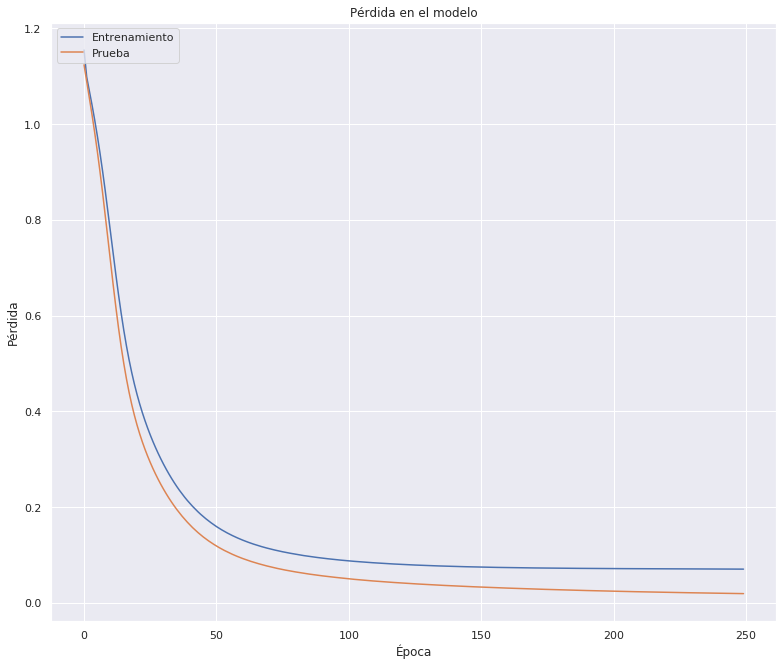

In [14]:
# Plot training & validation loss values
plt.figure(figsize=(13, 11))
plt.plot(historia.history['loss'])
plt.plot(historia.history['val_loss'])
plt.title("Pérdida en el modelo")
plt.ylabel("Pérdida")
plt.xlabel("Época")
plt.legend(["Entrenamiento", "Prueba"], loc='upper left')
plt.show()

Claramente se nota sobrejuste en el entrenamiento y validación. Las razones más probables es el tamaño de la red neuronal o el número de datos de entrenamiento, o los datos como tal.

Quizás es posible que haciendo algún tipo de regularización mejore el resultado, pero por el momento se mejoró el resultado que se había obtenido primero solamente con ligeros ajustes al diseño.

## Ejercicio

- Experimentar con el `batch_size`, el número de unidades en todas las capas excepto la última y el optimizador para lograr una mejor clasificación, si es posible.

- Nótese que nunca se comparó el resultado de entrenamiento y prueba para comprobar el sobreajuste, ¿será importante considerarlo? Hacer esto en `keras` mediante la visualización de la evolución del entrenamiento y el ajuste.